In [1]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

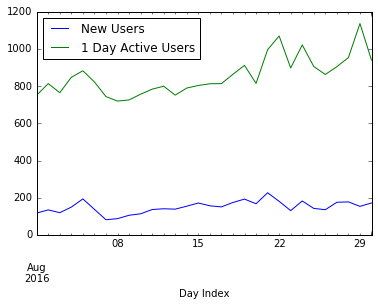

In [48]:
#Load tables
n_days=30
new_users = pd.read_csv("Analytics Mobile Data New Users 20160801-20160831.csv", parse_dates=[0], thousands=',', skiprows=5, index_col=0, nrows=n_days)
active_users = pd.read_csv("Analytics Mobile Data Active Users 20160801-20160831.csv",  parse_dates=[0], thousands=',', skiprows=5, index_col=0, nrows=n_days)

l1 = new_users.plot()
l2 = active_users.plot(ax=l1)
plt.show()


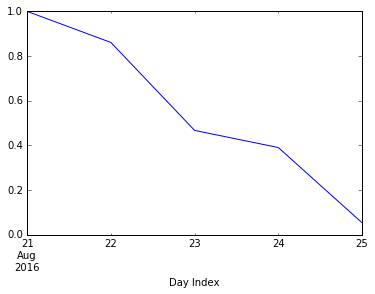

Lifetime value:  2.244473342  days


In [101]:
#Select day for analysis
day=20

from scipy import integrate

data_new=new_users[day:]
data_all=active_users[day:]

data_cum_sum=data_new.apply(np.cumsum)
retention = data_all['1 Day Active Users'] - data_cum_sum['New Users']

retention = retention/retention.max()
retention = retention[retention > -0.01]

retention.plot()
plt.show()

#Numerically integrate the time series.
print ("Lifetime value: ", integrate.trapz(retention.values), " days")

